## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import itertools
import optuna
import pickle

import sklearn
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, \
    QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts

import yellowbrick

import posture_detector
from posture_detector.constants import columns

# Load

## Load Models

In [3]:
with open('../models/hyper_lda_clf.pkl', 'rb') as file:
    lda_clf = pickle.load(file)
with open('../models/hyper_ridge_clf.pkl', 'rb') as file:
    ridge_lf = pickle.load(file)

## Load Dataset


In [8]:
data_location = 'data/raw/datalog_at_2021-06-12_18_39_06.887277'

In [9]:
df_raw = pd.read_csv('../' + data_location)
df_raw.head()

,Ax,Ay,Az,Temperature,gx,gy,gz,FlexSensor,Label
0,-0.304688,-0.933105,-0.206787,31.2124,-2.06870,1.732820,0.282443,543,NaN
1,-0.309326,-0.938232,-0.188721,31.2594,-5.71756,-3.488550,0.374046,543,NaN
2,-0.320312,-0.943359,-0.200439,31.2594,-2.96947,-1.053440,3.145040,545,t
3,-0.330078,-0.938477,-0.196533,31.2124,-2.50382,-0.923664,2.106870,545,t
4,-0.318359,-0.935547,-0.181152,31.3065,-2.76336,-1.274810,1.160310,545,t


# Prepared Dataset

In [11]:
df = posture_detector.data.parse_dataset(df_raw)
df.head()

,Ax,Ay,Az,gx,gy,gz,FlexSensor,Label
83,-0.315918,-0.868896,-0.149414,-9.694660,-2.06870,-5.404580,546,0
84,-0.353271,-0.929932,-0.209229,-0.137405,-1.02290,4.854960,547,0
85,-0.367432,-0.929688,-0.127197,-0.396947,5.18321,2.290080,547,0
86,-0.339111,-0.927002,-0.190430,-5.618320,-1.06870,-1.198470,549,0
87,-0.353271,-0.928711,-0.142822,-2.389310,1.80153,0.038168,547,0


# Plot Labeled Data

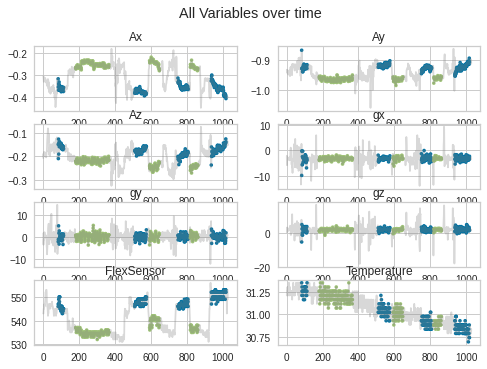

In [12]:
figure, axis = plt.subplots(4, 2)
cols = [
    columns.Record.Ax,
    columns.Record.Ay,
    columns.Record.Az,
    columns.Record.Gx,
    columns.Record.Gy,
    columns.Record.Gz,
    columns.Record.Flex,
    columns.Record.T,
]

for ax, col in zip(axis.flat, cols):
    posture_detector.viz.plot_positions_from_df(
        df_raw, ['e', 'c'], col, ax
    )
    ax.set_title(col)
plt.suptitle('All Variables over time')
plt.show()

# Plot

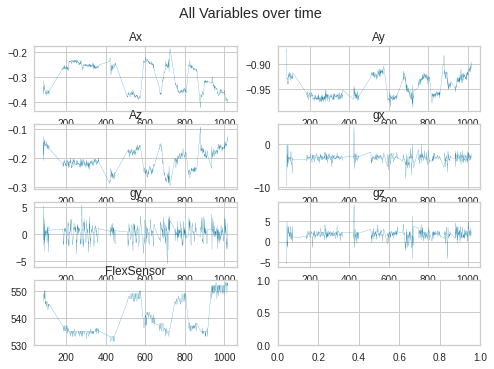

In [14]:

figure, axis = plt.subplots(4, 2)
cols = [
    columns.Record.Ax,
    columns.Record.Ay,
    columns.Record.Az,
    columns.Record.Gx,
    columns.Record.Gy,
    columns.Record.Gz,
    columns.Record.Flex,
]

for ax, col in zip(axis.flat, cols):
    ax.plot(df.index, df[col].values, lw=.2)
    ax.set_title(col)
plt.suptitle('All Variables over time')
plt.show()

In [15]:
y_lda = lda_clf.predict(df.drop(columns=columns.Record.Label))

In [16]:
y_ridge = ridge_lf.predict(df.drop(columns=columns.Record.Label))

# Plot Classifications for Unlabeled Data

In [17]:
cols = [
    columns.Record.Ax,
    columns.Record.Ay,
    columns.Record.Az,
    columns.Record.Gx,
    columns.Record.Gy,
    columns.Record.Gz,
    columns.Record.Flex,
]

# LDA Classifications

In [50]:
len(y_lda)

644

In [18]:
d = df_raw.copy()
d.loc[d['Label'].apply(lambda x: x in {'c', 'e', 'm'}), 'Label'] = y_lda
d['Label'].unique()

array([nan, 't', 0, 1], dtype=object)

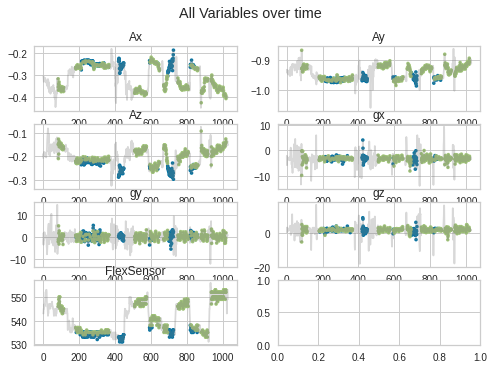

In [28]:
figure, axis = plt.subplots(4, 2)

for ax, col in zip(axis.flat, cols):
    posture_detector.viz.plot_positions_from_df(
        d, [1, 0], col, ax
    )
    ax.set_title(col)
plt.suptitle('All Variables over time')
#plt.savefig('../../images/osdif.png')
plt.show()

# Ridge Classifications

In [20]:
d = df_raw.copy()
d.loc[d['Label'].apply(lambda x: x in {'c', 'e', 'm'}), 'Label'] = y_ridge
d['Label'].unique()

array([nan, 't', 0, 1], dtype=object)

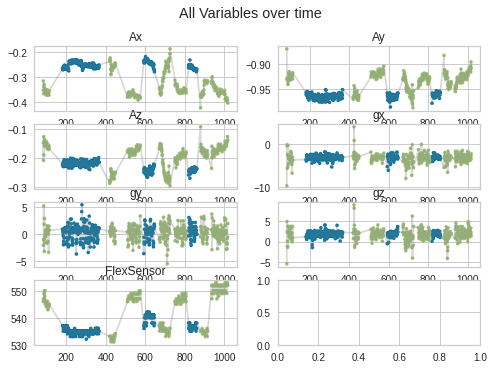

In [21]:
figure, axis = plt.subplots(4, 2)

for ax, col in zip(axis.flat, cols):
    posture_detector.viz.plot_positions_from_df(
        df, [1, 0], col, ax
    )
    ax.set_title(col)
plt.suptitle('All Variables over time')
plt.show()

In [26]:
sklearn.metrics.accuracy_score(df[columns.Record.Label], y_lda)

0.6475155279503105